<a href="https://colab.research.google.com/github/nstagnaro/mat281-repository/blob/main/Lab06-NicolásStagnaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
data.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

In [4]:
#Primero separemos cada grupo (I, II, III, IV).
G1= data[data["dataset"] == "I"]
G2= data[data["dataset"] == "II"]
G3 = data[data["dataset"] == "III"]
G4 = data[data["dataset"] == "IV"]

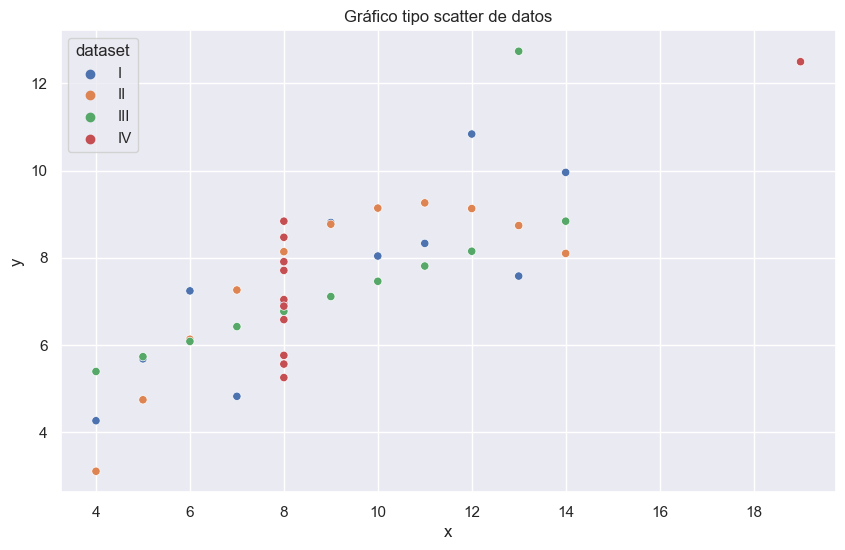

In [5]:
#Grafiquemos primero todo junto:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot( 
    x='x',
    y='y',
    hue='dataset', #se hace una leyenda por cada grupo
    data=data, #se usa el df como la información
)
plt.title('Gráfico tipo scatter de datos')
plt.show()

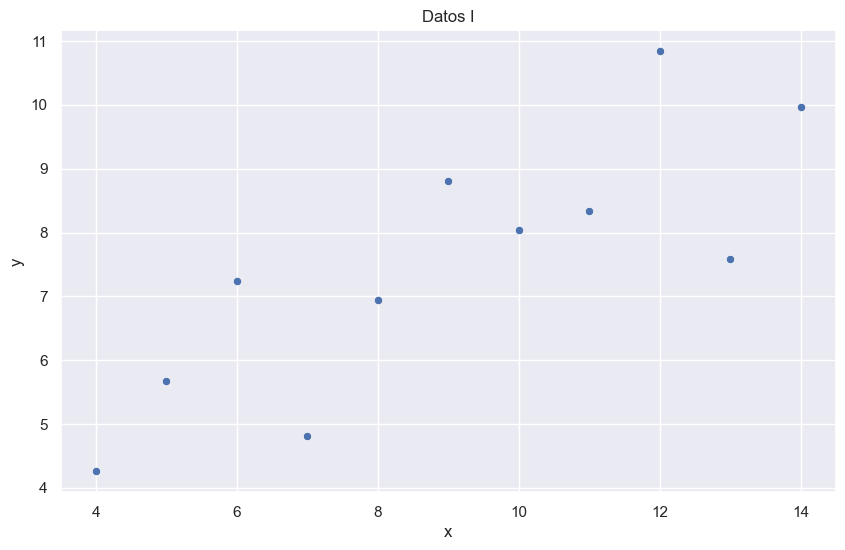

In [6]:
#Graficamos ahora por separado
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot( 
    x='x',
    y='y',
    data=G1, #se usa el I como la información
)
plt.title('Datos I')
plt.show()

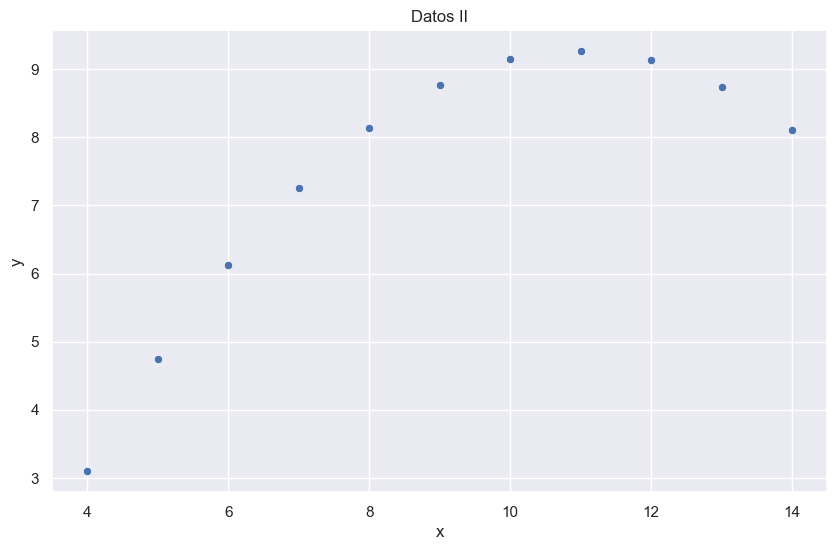

In [7]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot( 
    x='x',
    y='y',
    data=G2, #se usa el II como la información
)
plt.title('Datos II')
plt.show()

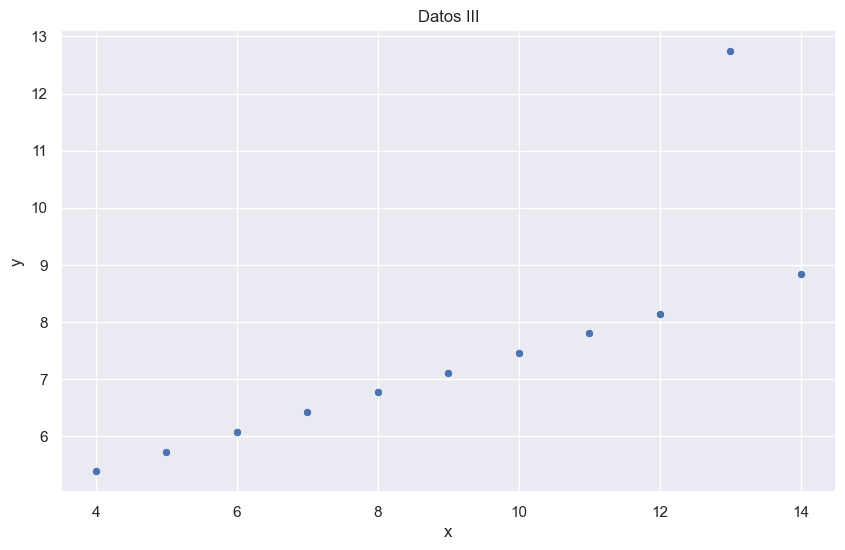

In [8]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot( 
    x='x',
    y='y',
    data=G3, #se usa el III como la información
)
plt.title('Datos III')
plt.show()

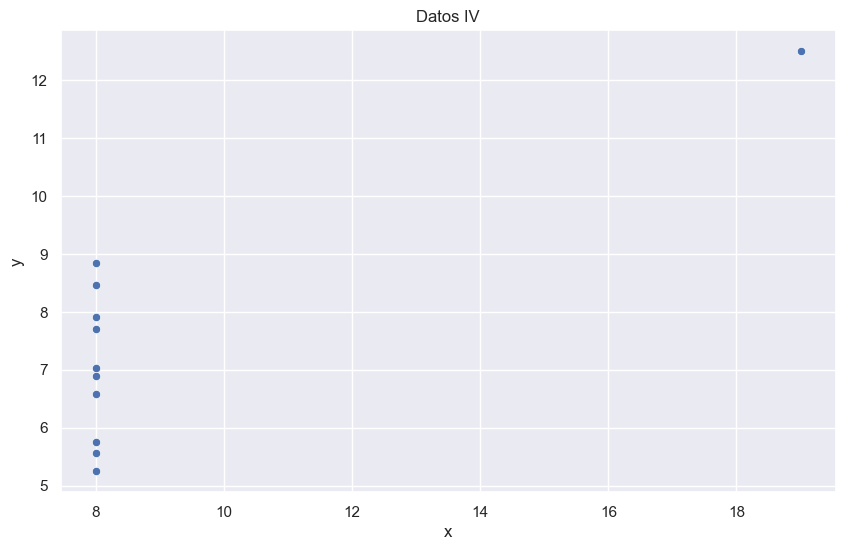

In [9]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot( 
    x='x',
    y='y',
    data=G4, #se usa el III como la información
)
plt.title('Datos IV')
plt.show()

A simple vista, los grupos sí son muy distintos entre sí. Se puede notar que el "II" sigue algo parecido a una parábola, el "III" se parece a una recta, el "IV" está muy concentrado en una línea, y el "I" está muy disperso.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [10]:
#Utilizando los grupos por separados, podemos, inmediatamente, describir los grupos:
G1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [11]:
G2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [12]:
G3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [13]:
G4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Se observa que, a pesar de lo distintos que son los grupos, tienen datos, como la media y la desviación estándar, en común.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

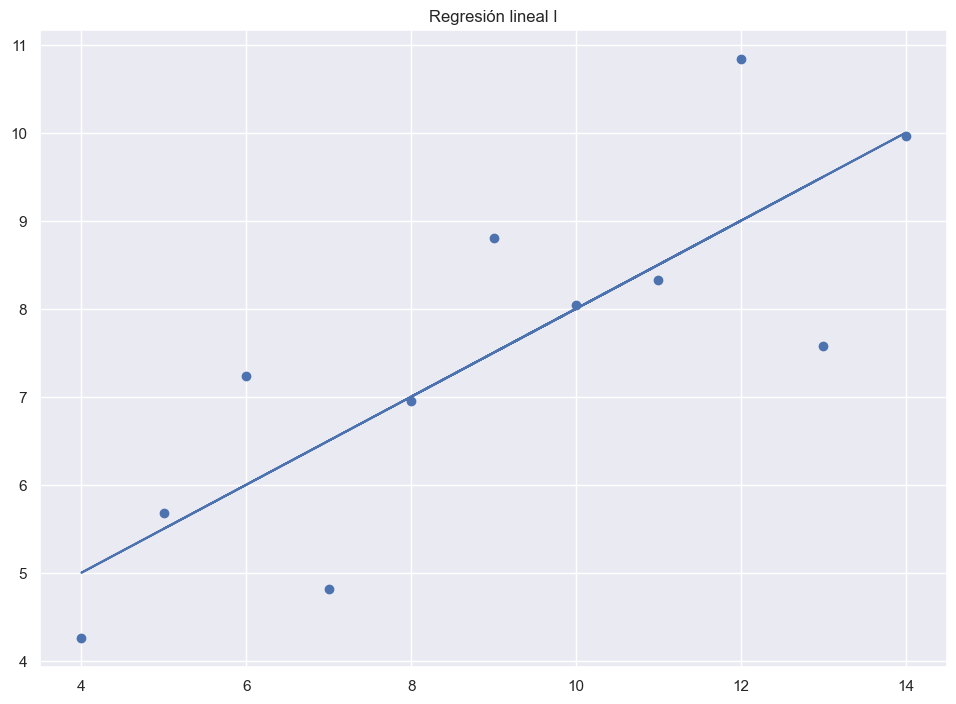

In [14]:
from scipy import stats 

def myfunc(x): #creamos una función que crea el ajuste lineal
  return slope * x + intercept

#Usamos un reajuste de regresión lineal
x1= G1['x']
y1 = G1['y']

slope, intercept, r, p, std_err = stats.linregress(x1, y1)

mymodel1 = list(map(myfunc, x1))

plt.scatter(x1, y1) #ploteamos los puntos
plt.plot(x1, mymodel1) #ploteamos la regresión
plt.title('Regresión lineal I')
plt.show()

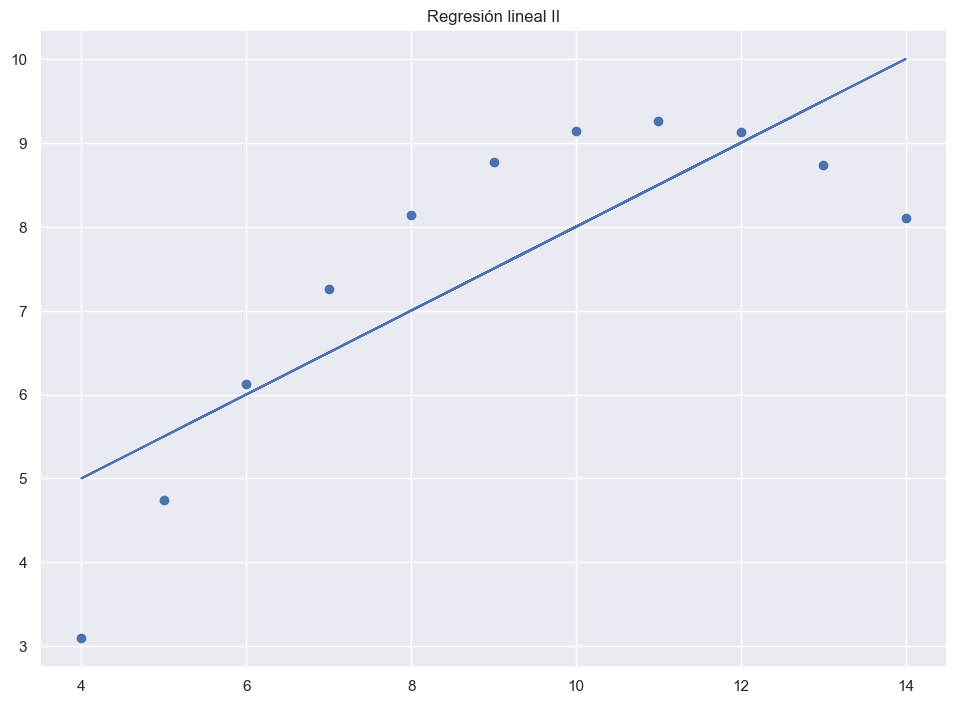

In [15]:
x2= G2['x']
y2 = G2['y']

slope, intercept, r, p, std_err = stats.linregress(x2, y2)

mymodel2 = list(map(myfunc, x2))

plt.scatter(x2, y2)
plt.plot(x2, mymodel2)
plt.title('Regresión lineal II')
plt.show()

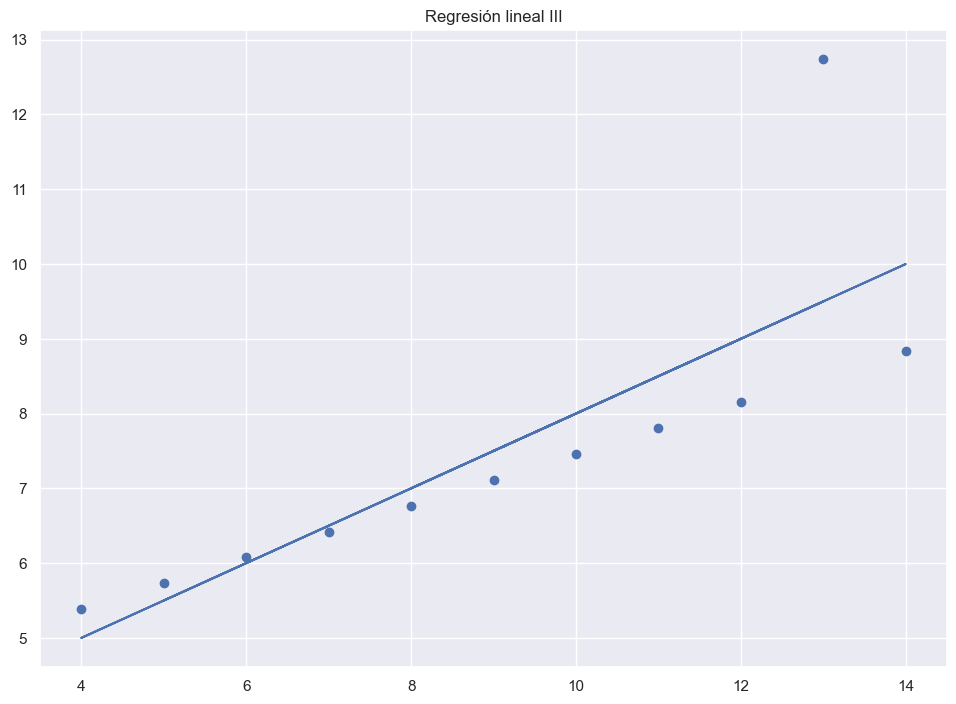

In [16]:
x3= G3['x']
y3 = G3['y']

slope, intercept, r, p, std_err = stats.linregress(x3, y3)

mymodel3 = list(map(myfunc, x3))

plt.scatter(x3, y3)
plt.plot(x3, mymodel3)
plt.title('Regresión lineal III')
plt.show()

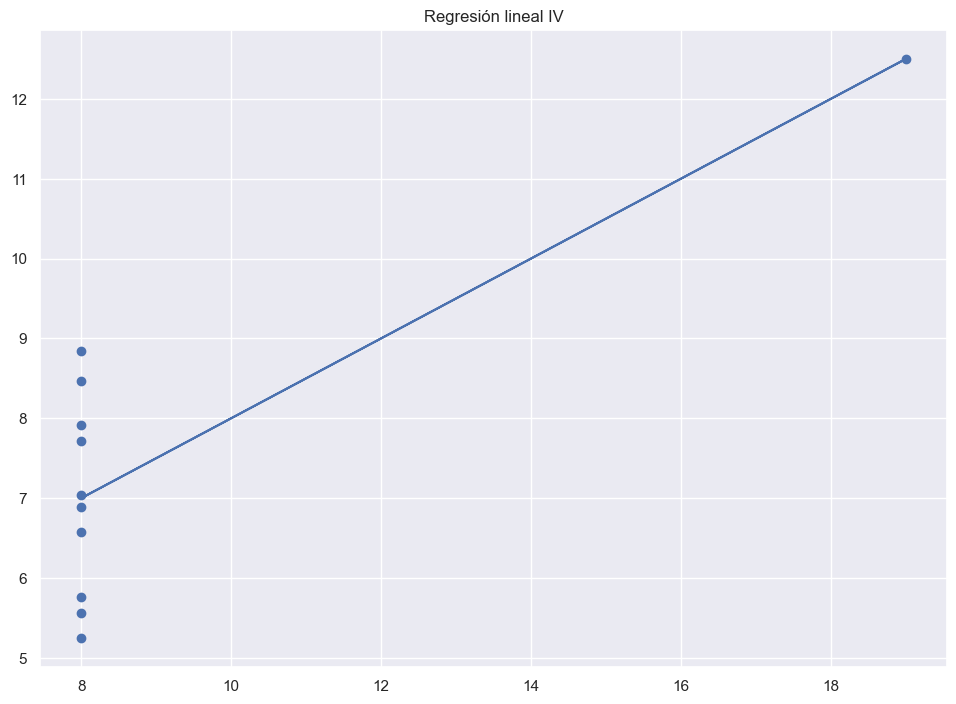

In [17]:
x4 = G4['x']
y4 = G4['y']

slope, intercept, r, p, std_err = stats.linregress(x4, y4)

mymodel4 = list(map(myfunc, x4))

plt.scatter(x4, y4)
plt.plot(x4, mymodel4)
plt.title('Regresión lineal IV')
plt.show()

Podemos ver que el reajuste lineal no es bueno para los gráficos 1, 2 y 4; y para el gráfico 3, si bien es parecido, la dispersión de unos pocos datos hace que no sea muy fiable.

In [18]:
#Copiamos y pegamos los códigos realizados 
def mae(y, yhat) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    """
    # agregar codigo 
    metrica = 0
    n = len(y)
    suma=sum(abs(y-yhat))
    metrica = suma/n

    return metrica

def rmse(y, yhat) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    """
    # agregar codigo 
    metrica = 0
    n = len(y)
    suma=sum((y-yhat)**2)
    metrica = suma/n
    
    return metrica

def mape(y, yhat) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    """
    # agregar codigo 
    metrica = 0
    n = len(y)
    suma=sum(abs((y-yhat))/y)
    metrica=suma/n
    
    return metrica

def smape(y, yhat) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    """
    # agregar codigo 
    metrica = 0
    n = len(y)
    suma=sum((2*abs(y-yhat))/((y**2)+(yhat**2)))
    metrica = suma/n
    
    return metrica


def rsquared(y, yhat) -> float:
    """
    Calculo del r-cuadrado
    """
    # agregar codigo 
    metrica = 0

    suma_y=sum(y)
    n=len(y)
    prom_y=suma_y/n

    SSreg=sum((yhat-prom_y)**2)
    SSres=sum((y-yhat)**2) 
    SStot=SSres+SSreg
    
    metrica = SSreg/SStot

    return metrica


#MAE
mae1=mae(np.array(y1), np.array(mymodel1))
mae2=mae(np.array(y2), np.array(mymodel2))
mae3=mae(np.array(y3), np.array(mymodel3))
mae4=mae(np.array(y4), np.array(mymodel4))

#RMSE
rmse1=rmse(np.array(y1), np.array(mymodel1))
rmse2=rmse(np.array(y2), np.array(mymodel2))
rmse3=rmse(np.array(y3), np.array(mymodel3))
rmse4=rmse(np.array(y4), np.array(mymodel4))

#MAPE
mape1=mape(np.array(y1), np.array(mymodel1))
mape2=mape(np.array(y2), np.array(mymodel2))
mape3=mape(np.array(y3), np.array(mymodel3))
mape4=mape(np.array(y4), np.array(mymodel4))

#SMAPE
smape1=smape(np.array(y1), np.array(mymodel1))
smape2=smape(np.array(y2), np.array(mymodel2))
smape3=smape(np.array(y3), np.array(mymodel3))
smape4=smape(np.array(y4), np.array(mymodel4))

#R2
r1=rsquared(np.array(y1),np.array(mymodel1))
r2=rsquared(np.array(y2),np.array(mymodel2))
r3=rsquared(np.array(y3),np.array(mymodel3))
r4=rsquared(np.array(y4),np.array(mymodel4))

In [19]:
I = {"MAE":mae1,
          "RMSE":rmse1,
          "MAPE":mape1,
          "SMAPE":smape1,
          "R2":r1}
print("I:",I)

II = {"MAE":mae2,
          "RMSE":rmse2,
          "MAPE":mape2,
          "SMAPE":smape2,
          "R2":r2}
print("II:",II)

III = {"MAE":mae3,
          "RMSE":rmse3,
          "MAPE":mape3,
          "SMAPE":smape3,
          "R2":r3}
print("III:",III)

IV = {"MAE":mae4,
          "RMSE":rmse4,
          "MAPE":mape4,
          "SMAPE":smape4,
          "R2":r4}
print("IV:",IV)

I: {'MAE': 0.8374049586776859, 'RMSE': 1.2511536363636362, 'MAPE': 0.12125783477322831, 'SMAPE': 0.017090017093981013, 'R2': 0.666542459508775}
II: {'MAE': 0.9679338842975209, 'RMSE': 1.2523900826446281, 'MAPE': 0.1569518620016047, 'SMAPE': 0.023245541223740174, 'R2': 0.6662420337274844}
III: {'MAE': 0.7159669421487608, 'RMSE': 1.250562892561984, 'MAPE': 0.07970727611180324, 'SMAPE': 0.009769328725785172, 'R2': 0.6663240410665592}
IV: {'MAE': 0.9027272727272727, 'RMSE': 1.249317272727273, 'MAPE': 0.13473848647069778, 'SMAPE': 0.0188020540085755, 'R2': 0.6667072568984653}


Se puede ver que la interpolación de datos por modelo de regresión lineal no es la mejor.

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Haremos un reajuste para el grupo 2 y grupo 3; el grupo 1 tiene datos muy aleatorios, y el grupo 4 tiene datos muy juntos en un solo punto de el eje x.

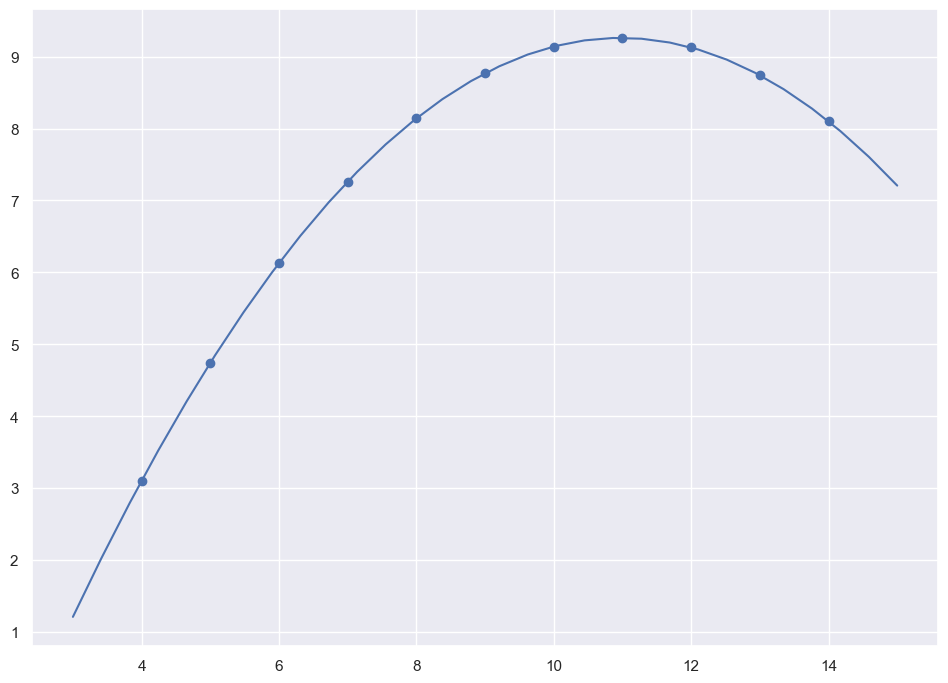

0.999999457857722

In [20]:
#Podemos crear un ajuste polinomico para el "grupo 2"
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x=G2['x'] #fijamos el eje x
y=G2['y'] #fijamos el eje
line = np.linspace(3,15,30)
polymodel = np.poly1d(np.polyfit(x, y, 2)) #reajustamos el modelo con un polinomio de grado 2

plt.scatter(x, y) #graficamos los puntos
plt.plot(line, polymodel(line)) #graficamos el polinomio
plt.show()

rsquared(np.array(y), np.array(polymodel(x))) #además, podemos ver el r^2 para el reajuste

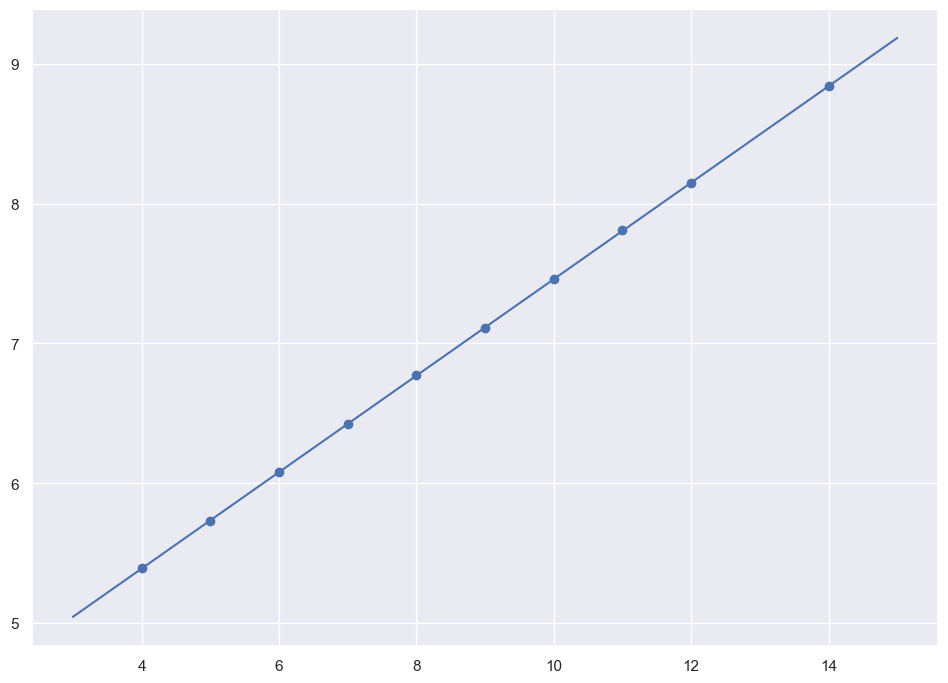

0.9999931075815331

In [21]:
#Podemos quitar un dato al "grupo 3"
NewG3 = G3.drop(24) #Quitamos el dato 
x = NewG3["x"]
y = NewG3["y"]
linearmodel = np.poly1d(np.polyfit(x, y, 1)) #creamos un reajuste polinomial de grado 1
line = np.linspace(3,15,30)
plt.scatter(x, y)
plt.plot(line, linearmodel(line))
plt.show()

rsquared(np.array(y), np.array(linearmodel(x))) #además, podemos ver el r^2 para el reajuste